# ЛР1. - Модель полиномиальной регрессии.

Создать обучающую выборку, воспользовавшись функцией

$$y(x)= θ_1 x+θ_2  sin⁡(x)+ θ_3$$

с добавлением шума с нормальным распределением.

Построить модель полиномиальной регрессии, аппроксимирующей данные обучающей выборки. Исходить из того, что степень полинома (начальный закон генерации обучающей выборки) неизвестен.

Обучение проводить методом наименьших квадратов.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.random.rand(150)*10

In [ ]:
y = 1/2*x + 2*np.sin(x) + 5

In [ ]:
#  Добавляет случайный шум к данным
y = y + np.random.randn(150)*0.5

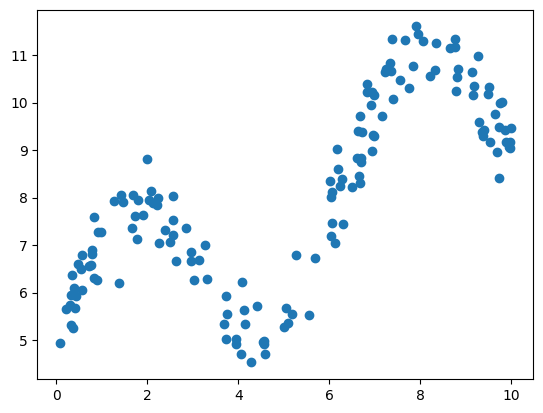

In [ ]:
plt.scatter(x,y)
plt.show()

In [ ]:
degrees = np.arange(1, 11) # определяем диапазон степеней полинома, который мы хотим проверить
n = len(y)

aic_scores = []
for degree in degrees:
    # создаем модель полиномиальной регрессии заданной степени
    p = np.polyfit(x, y, degree) # МНК
    y_hat = np.polyval(p, x)

    # вычисляем значение AIC для данной модели
    rss = np.sum((y - y_hat) ** 2) # residual sum of squares
    aic = n * np.log10(rss / n) + 2 * (degree + 1) # вычисляем значение AIC

    aic_scores.append(aic)

print("AIC: ", aic_scores)

# находим лучшую степень полинома по критерию AIC
best_degree = degrees[np.argmin(aic_scores)]

print("Степень полинома, обеспечивающая наибольшую точность: ", best_degree)


AIC:  [41.16466295296776, 39.53235514760808, 32.75877036329407, -42.143349888809055, -57.33526261207213, -81.55796495977971, -80.46520814195692, -79.05562547079656, -78.09834209334821, -76.10923873782961]
Степень полинома, обеспечивающая наибольшую точность:  6


In [ ]:
#polynomial fit
model = np.poly1d(np.polyfit(x, y, best_degree))

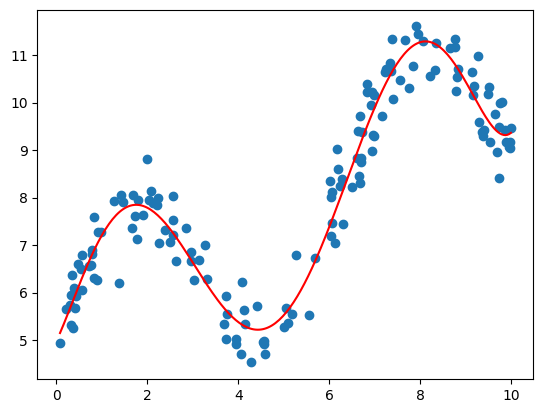

In [ ]:
polyline = np.linspace(np.min(x), np.max(x), 250)
plt.scatter(x, y)
plt.plot(polyline, model(polyline), color='red')
plt.show()

In [ ]:
print(model)

         6           5          4         3         2
0.00116 x - 0.03294 x + 0.3256 x - 1.247 x + 1.092 x + 2.092 x + 4.98


А теперь поделим выборку на обучающую и тестовую

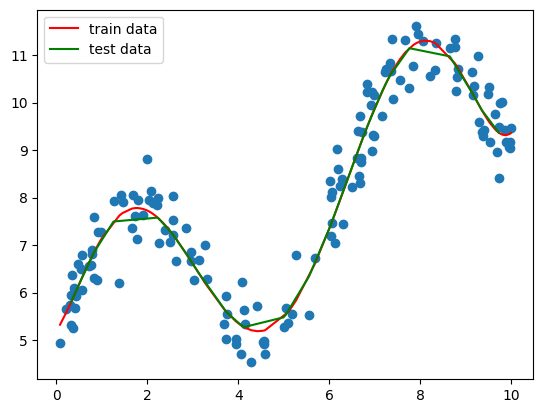

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=777)
model = np.poly1d(np.polyfit(X_train, y_train, best_degree))
X_train.sort()
X_test.sort()
plt.scatter(x, y)
plt.plot(X_train, model(X_train), color='red', label='train data')
plt.plot(X_test, model(X_test), color='green', label='test data')
plt.legend()
plt.show()
